# Week 4 Pro-Class Assignment 1

## Problem 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from  sklearn import datasets
%matplotlib inline
import pandas as pd

In [2]:
iris_df = datasets.load_iris()
data = iris_df['data']
df = pd.DataFrame(data=data)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
print(np.unique(iris_df['target']))

[0 1 2]


In [8]:
y = pd.Series(iris_df['target'])
print(y.index)
df['target'] = y
df.head()
subset1 = df.loc[df['target']!=0,:]
subset1.index = range(subset1.shape[0])
subset1.head()

RangeIndex(start=0, stop=150, step=1)


,sepal_length,sepal_width,petal_length,petal_width,target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [9]:
subset12 = subset1.loc[:,['sepal_length','petal_length','target']]
subset12.head()

,sepal_length,petal_length,target
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


In [10]:
X = subset12.loc[:,['sepal_length','petal_length']]
X.head()

,sepal_length,petal_length
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6


## Problem 2

**Scatter plot**

Text(0.5, 1.0, 'virginica')

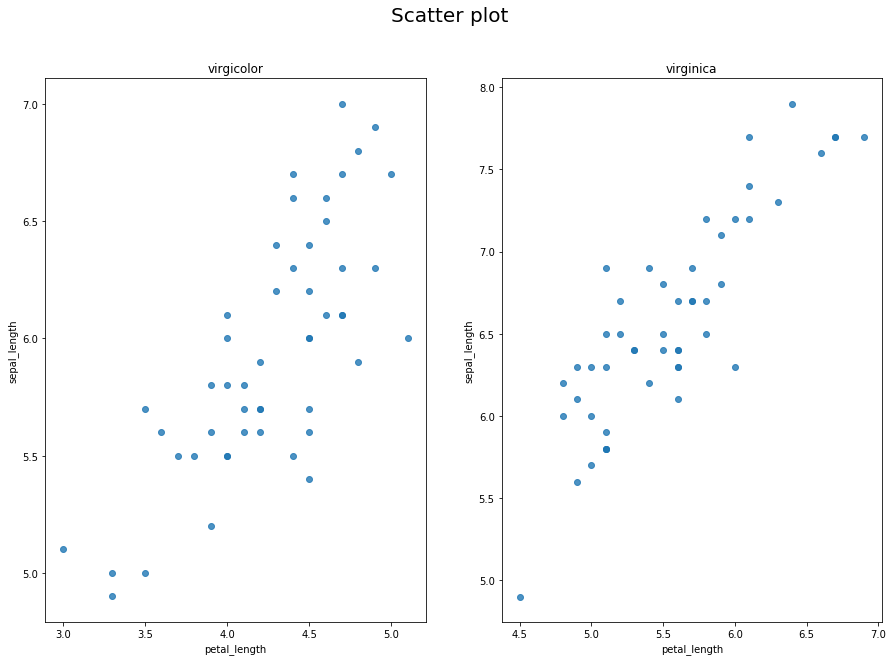

In [16]:
import seaborn as sns
target2 = subset12['target']
fig = plt.figure(1,figsize=(15,10))
fig.suptitle('Scatter plot',size=20)
plt.subplot(1,2,1)
sns.regplot(x='petal_length',y='sepal_length',data=subset12.loc[target2==1,:],fit_reg=False)
plt.title('virgicolor')
plt.subplot(1,2,2)
sns.regplot(x='petal_length', y='sepal_length',data=subset12.loc[target2==2,:],fit_reg=False)
plt.title('virginica')

**Box plot**

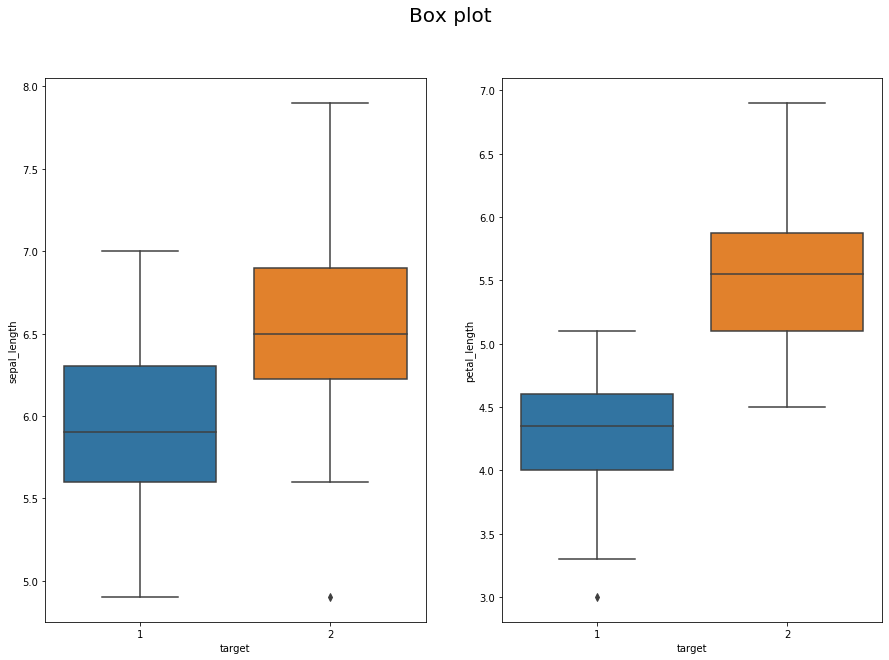

In [17]:
fig = plt.figure(1,figsize=(15,10))
fig.suptitle('Box plot',size=20)
plt.subplot(1,2,1)
sns.boxplot(x='target',y='sepal_length',data=subset12)
plt.subplot(1,2,2)
sns.boxplot(x='target', y='petal_length',data=subset12)

**Violin plot**

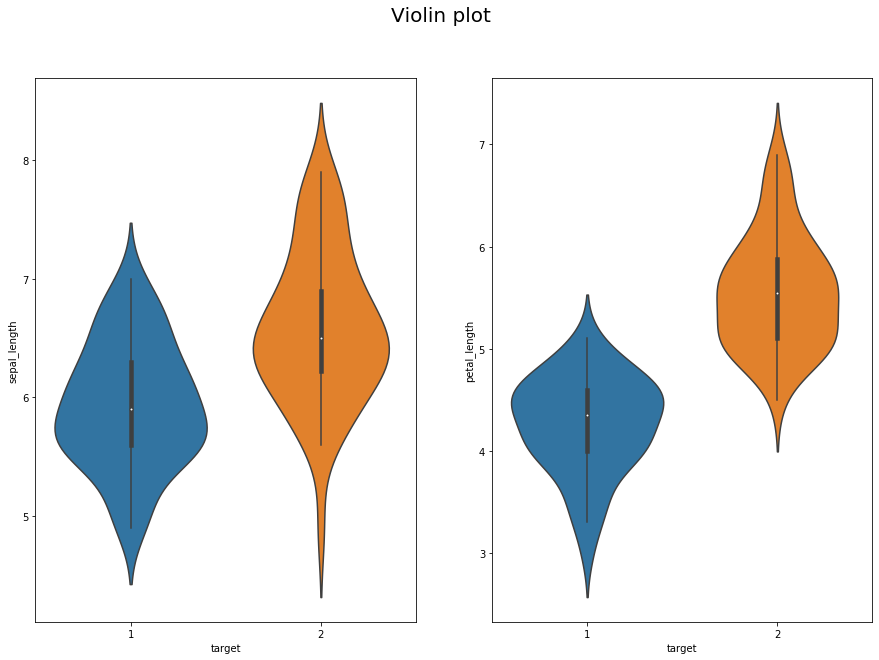

In [19]:
fig = plt.figure(1,figsize=(15,10))
fig.suptitle('Violin plot',size=20)
plt.subplot(1,2,1)
sns.violinplot(x='target',y='sepal_length',data=subset12)
plt.subplot(1,2,2)
sns.violinplot(x='target', y='petal_length',data=subset12)

## Problem 3

In [21]:
y = np.array(target2)
X = np.array(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [22]:
print(X_train.shape,X_test.shape)

(75, 2) (25, 2)


In [23]:
print(y_train.shape,y_test.shape)

(75,) (25,)


## Problem 4

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
X_train_std[:5]

array([[-0.20705632, -0.23887197],
       [ 0.0915826 , -0.23887197],
       [ 0.68886044, -0.58787322],
       [-0.95365361, -0.00620447],
       [-1.55093145, -1.16954197]])

## Problem 5

In [26]:
from sklearn.neighbors import KNeighborsClassifier as knn
nn_1  = knn(n_neighbors=1)
nn_3 = knn(n_neighbors=3)
nn_5 = knn(n_neighbors=5)
nn_1 = nn_1.fit(X_train,y_train)
nn_3 = nn_3.fit(X_train,y_train)
nn_5 = nn_5.fit(X_train,y_train)
nn_1_pred = nn_1.predict(X_test)
nn_3_pred = nn_3.predict(X_test)
nn_5_pred = nn_5.predict(X_test)

In [27]:
nn_1_pred

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2])

In [28]:
nn_3_pred

array([2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2])

In [29]:
nn_5_pred

array([2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2])

## Problem 6

In [31]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import confusion_matrix
acc_score = accuracy_score(y_test,nn_5_pred)
pre_score = precision_score(y_test,nn_5_pred)
re_score = recall_score(y_test,nn_5_pred)
f_score = f1_score(y_test,nn_5_pred)

In [34]:
confusion_matrix(y_test,nn_5_pred)

array([[12,  1],
       [ 1, 11]])

In [37]:
print('Accuracy: {:.3f}'.format(acc_score))
print('Precision: {:.3f}'.format(pre_score))
print('Recall: {:.3f}'.format(re_score))
print('F value: {:.3f}'.format(f_score))
                

Accuracy: 0.920
Precision: 0.923
Recall: 0.923
F value: 0.923


## Problem 7

In [38]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [43]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

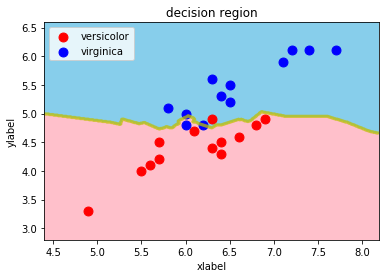

In [46]:
decision_region(X_test,y_test,nn_5)

## Problem 8

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

lr = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

lr = lr.fit(X_train,y_train)
svc = svc.fit(X_train,y_train)
tree = tree.fit(X_train,y_train)
forest = forest.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_tree=tree.predict(X_test)
y_pred_forest=forest.predict(X_test)


pred_list = [y_pred_lr,y_pred_svc,y_pred_tree,y_pred_forest]
acc_list = []
pre_list = []
re_list = []
f_list = []

for i in range(len(pred_list)):
    acc_score = accuracy_score(y_test,pred_list[i])
    pre_score = precision_score(y_test,pred_list[i])
    re_score = recall_score(y_test,pred_list[i])
    f_score = f1_score(y_test,pred_list[i])
    acc_list.append(acc_score)
    pre_list.append(pre_score)
    re_list.append(re_score)
    f_list.append(f_score)

scores = pd.DataFrame(data={
    'Accuracy':acc_list,
    'Precision':pre_list,
    'Recall':re_list,
    'F value':f_list},
index=['LR','SVC','Tree','Forest'])
scores
    

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Accuracy,Precision,Recall,F value
LR,0.92,0.923077,0.923077,0.923077
SVC,0.84,0.846154,0.846154,0.846154
Tree,0.84,0.846154,0.846154,0.846154
Forest,0.80,0.833333,0.769231,0.800000


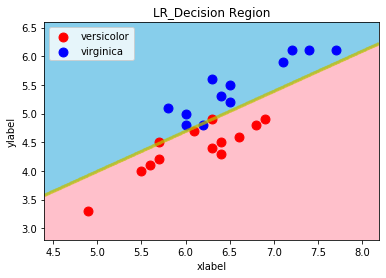

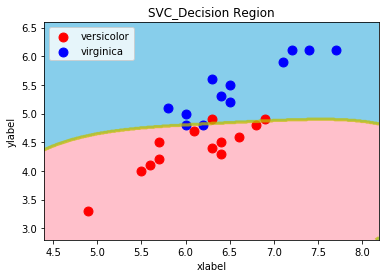

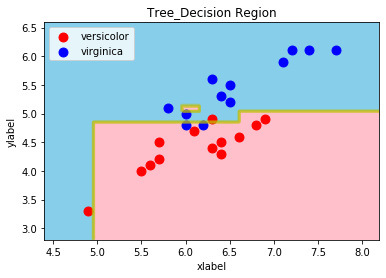

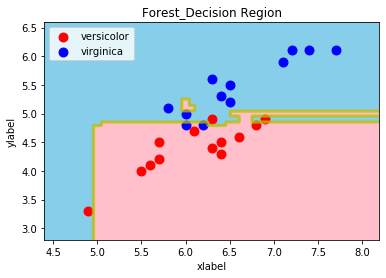

In [56]:
estimators = [lr, svc, tree,forest]
estimator_names = ['LR', 'SVC', 'Tree','Forest']
for i in range(len(estimators)):
    decision_region(X_test,y_test,estimators[i],title=estimator_names[i] + '_Decision Region')

**Overall, we see that Linear Regression is the best one for classification.**